
# Лабораторная 5

## Вариант 6

Для  одноканальной системы массового обслуживания с ограничением на длину очереди $m$ составьте дифференциальные уравнения для вероятностей нахождения в заданных состояниях в зависимости от времени. Найдите эти вероятности при определенном в соответствии с вариантом значении $t$, а также при $t\rightarrow \infty$. Канал иногда может выходить из строя. Заявка, которая обслуживается в момент отказа канала ставится в очередь, если там есть места, в противном случае она покидает систему необслуженной. Входящий поток, поток обслуживания, поток отказов и поток восстановления простейшие с соответствующими интенсивностями $\lambda, \mu, \nu, \gamma$. Количество клиентов, от которых могут поступать заявки на обслуживание $k$. Начальные условия $P_0(0)=1$. 

Найти (теоретически и экспериментально):
 - вероятность простоя;
 - вероятность образования очереди;
 - абсолютную пропускную способность;
 - среднюю длину очереди;
 - среднее время нахождения заявок в системе;
 - среднее число заявок в системе.
 - среднее время нахождения в очереди.

## Пояснения преподавателя

Вытесненная заявка встает в конец очереди. Время ремонта не учитывается. Из-за этих фактов актуальны формулы из лекции для $T_{сист}$ и $W_{оч}$.

Для просмотра параметров по варианту открыть тут: https://nbviewer.org/github/junaart/ForStudents/blob/master/KIS/Lab_5/Laboratory_work_5.ipynb

$k = inf$ - нет ограничений на кол-во заявок, т.е. система размокнутая.

$m$ - ограничение на размер очереди.

Там, где построить иммитационную модель, теоретически ничего считать не нужно (c) Артамонов.

Это **_замкнутая_ одноканальная СМО с ограничением на длину очереди: $M/M/1/m$**.

In [223]:
Variant<-6
set.seed(Variant) 
m<-sample(c(4:18),1)
mu<-runif(1)
lambda<-runif(1)
if (lambda>mu) {
  current<-lambda; 
  lambda<-mu; 
  mu<-current
}
gamma<-runif(1)
nu<-runif(1)
if (gamma<nu) {
  current<-nu; 
  nu<-gamma; 
  gamma<-current
}
if (sample(c(0:1),1)) {
  k<-sample(c(4:7),1)
} else {
  k<-"inf"
}
t<-runif(1)
View(data.frame(lambda, mu, nu, gamma, k, m, t))

lambda    mu       nu        gamma     k m t        
1 0.2643521 0.937642 0.3800939 0.8074834 7 8 0.7627319

## Теоретическое решение
### Граф состояний

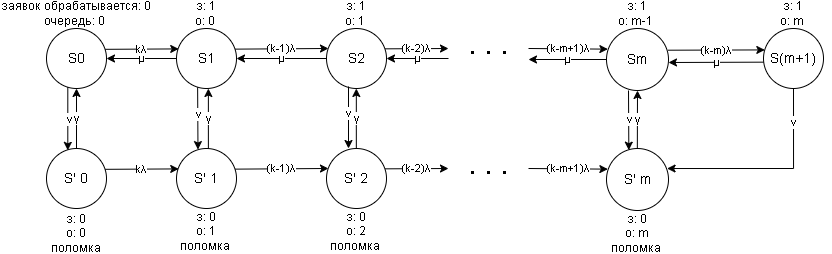

> вероятность простоя

\- это вероятность того, что система исправна, но не обрабатывает заявки $= P_0 $;

<br/>


> вероятность образования очереди;

\- это вероятность, что в системе есть очередь $= 1 - P_0 - P_1$;

<br/>


> абсолютную пропускную способность

\- это среднее число заявок, которое может обслужить система за единицу времени $\Lambda = (1-P_{отк}) \lambda$

$P_{отк}$ - это вероятность получить отказ, т.е. не попасть на обработку, и не встать в очередь
$$P_{отк} = P_{m+1} + P'_{m}$$
$$\Lambda = \lambda(1-P_{m+1} - P'_{m})$$

<br/>


> среднюю длину очереди

\- это сумма всех вероятностей образования очереди длины i умножить на размер очереди i:
$$L_{\text{оч}}=\sum_{i=1}^{m}iP_{i+1}+\sum_{i=1}^{m}iP'_{i}$$

<br/>


> среднее время нахождения в очереди

$$W_{\text{оч}}=\frac{L_{\text{оч}}}{\Lambda}$$

<br/>




> среднее число заявок в системе

$$L_{\text{сист}}=\sum_{i=1}^{m+1}iP_{i}+\sum_{i=1}^{m}iP'_{i}$$

<br/>


> Среднее время нахождения заявок в системе:
$$T_{сист} = \frac{L_{сист}}{\Lambda}$$



### Уравнения Колмогорова


$$\frac{dP_0(t)}{dt}=\mu P_1(t) - k \lambda P_0(t) + \gamma P'_0(t) - \nu P_0(t) \\

\frac{dP_i(t)}{dt}=(k-i+1) \lambda P_{i-1}(t) + \gamma P'_i(t) + \mu P_{i+1}(t) - (\mu + \nu + (k-i) \lambda) \cdot P_i(t), \quad \quad 1 \leq i \leq m \\

\frac{dP_{m+1}(t)}{dt}=(k-m) \lambda P_{m}(t) - \mu P_{m+1}(t) - \nu P_{m+1}(t) $$


$$ \underline{\hspace{ 12 cm}} $$


$$ \frac{dP'_0(t)}{dt}=\nu P_0(t) - \gamma P'_0(t) - k \lambda P'_0(t) \\

\frac{dP'_i(t)}{dt}=(k-i+1) \lambda P'_{i-1}(t) + \nu P_i(t) - (\gamma + (k-1) \lambda) \cdot P'_i(t) , \quad \quad 1 \leq i \leq m - 1 \\

\frac{dP'_m(t)}{dt}= (k-m+1) \lambda P'_{m-1}(t) + \nu P_m(t) -\gamma P'_m(t) + \nu P_{m+1}(t) $$

$\uparrow$ Всего $2m+3$ уравнений $\uparrow$ 

Условие нормировки:
$$\sum_{i=0}^m \left(P_i(t) + P'_i(t)\right) + P'_{m+1}(t) = 1$$

Начальные условия:
$$
\begin{cases}
  P_0(0) = 1,\\

  P_i(0) = 0, & 1 \leq i \leq m+1 \\
  
  P'_i(0) = 0, & 0 \leq i \leq m \\
\end{cases}
$$

Если $k < m$, то:
$$
\begin{cases}
  P_i(t) = 0, & i \gt k \\
  P'_i(t) = 0, & i \gt k
\end{cases}
$$

Решу в Maxima численным методами Рунге-Кутта

```js
λ:0.26$;
η:0.93$;
ν:0.38$;
γ:0.8$;
k:7$;

sol: rk([
        η*P1 - k*λ*P0 + γ*P_0 - ν*P0,
        (k)  *λ*P0 + γ*P_1 + η*P2 - (η + ν + (k-1)*λ)*P1,
        (k-1)*λ*P1 + γ*P_2 + η*P3 - (η + ν + (k-2)*λ)*P2,
        (k-2)*λ*P2 + γ*P_3 + η*P4 - (η + ν + (k-3)*λ)*P3,
        (k-3)*λ*P3 + γ*P_4 + η*P5 - (η + ν + (k-4)*λ)*P4,
        (k-4)*λ*P4 + γ*P_5 + η*P6 - (η + ν + (k-5)*λ)*P5,
        (k-5)*λ*P5 + γ*P_6 + η*P7 - (η + ν + (k-6)*λ)*P6,
        (k-6)*λ*P6 + γ*P_7 + η*P8 - (η + ν + (k-7)*λ)*P7,
        /* (k-7)*λ*P7 + γ*P_8 + η*P9 - (η + ν + (k-8)*λ)*P8, */
        /* (k-8)*λ*P8 - η*P9 - ν*P9, */
        
        0,
        0,
        
        ν*P0 - γ*P_0 - k*λ*P_0,
        (k)  *λ*P_0 + ν*P1 - (γ + (k-1)*λ)*P_1,
        (k-1)*λ*P_1 + ν*P2 - (γ + (k-2)*λ)*P_2,
        (k-2)*λ*P_2 + ν*P3 - (γ + (k-3)*λ)*P_3,
        (k-3)*λ*P_3 + ν*P4 - (γ + (k-4)*λ)*P_4,
        (k-4)*λ*P_4 + ν*P5 - (γ + (k-5)*λ)*P_5,
        (k-5)*λ*P_5 + ν*P6 - (γ + (k-6)*λ)*P_6,
        (k-6)*λ*P_6 + ν*P7 - (γ + (k-7)*λ)*P_7,
        /* (k-7)*λ*P_7 + ν*P8 + ν*P9 - γ*P_8, */
        
        0
    ], [
        P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,
        /* P8 , P9, */
        P_0,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8
        /* P_8 */
    ], [
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0  /* 2m + 3 = 19 штук*/
    ], [
        t, 0, 30, 0.02
    ])$
```


Отмечу значение t на графике, чтобы найти приблизительную вероятность

In [224]:
print(paste('t =', t))

[1] "t = 0.762731856433675"


Далее, с помощью такого кода по графикам найду $P_i(t)$, $\lim_{t\to\infty}{P_i(t)}$, $P'_i(t)$, $\lim_{t\to\infty}{P'_i(t)}$:

<br/>

```js
t: 0.762731856433675$

plot2d(
    [
        [discrete, makelist([p[1], p[2]], p, sol)],
        [discrete, [[t, 0], [t, 0.31]]]
    ], [xlabel, "t"], [ylabel, "P0"]
);
plot2d([[discrete, makelist([p[1], p[3]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P1"]);
plot2d([[discrete, makelist([p[1], p[4]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P2"]);
plot2d([[discrete, makelist([p[1], p[5]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P3"]);
plot2d([[discrete, makelist([p[1], p[6]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P4"]);
plot2d([[discrete, makelist([p[1], p[7]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P5"]);
plot2d([[discrete, makelist([p[1], p[8]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P6"]);
plot2d([[discrete, makelist([p[1], p[9]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P7"]);

plot2d([[discrete, makelist([p[1], p[10]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P8"]);
plot2d([[discrete, makelist([p[1], p[11]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P9"]);

plot2d([[discrete, makelist([p[1], p[12]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P'0"]);
plot2d([[discrete, makelist([p[1], p[13]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P'1"]);
plot2d([[discrete, makelist([p[1], p[14]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P'2"]);
plot2d([[discrete, makelist([p[1], p[15]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P'3"]);
plot2d([[discrete, makelist([p[1], p[16]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P'4"]);
plot2d([[discrete, makelist([p[1], p[17]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P'5"]);
plot2d([[discrete, makelist([p[1], p[18]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P'6"]);
plot2d([[discrete, makelist([p[1], p[19]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P'7"]);

plot2d([[discrete, makelist([p[1], p[20]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P'8"]);
```

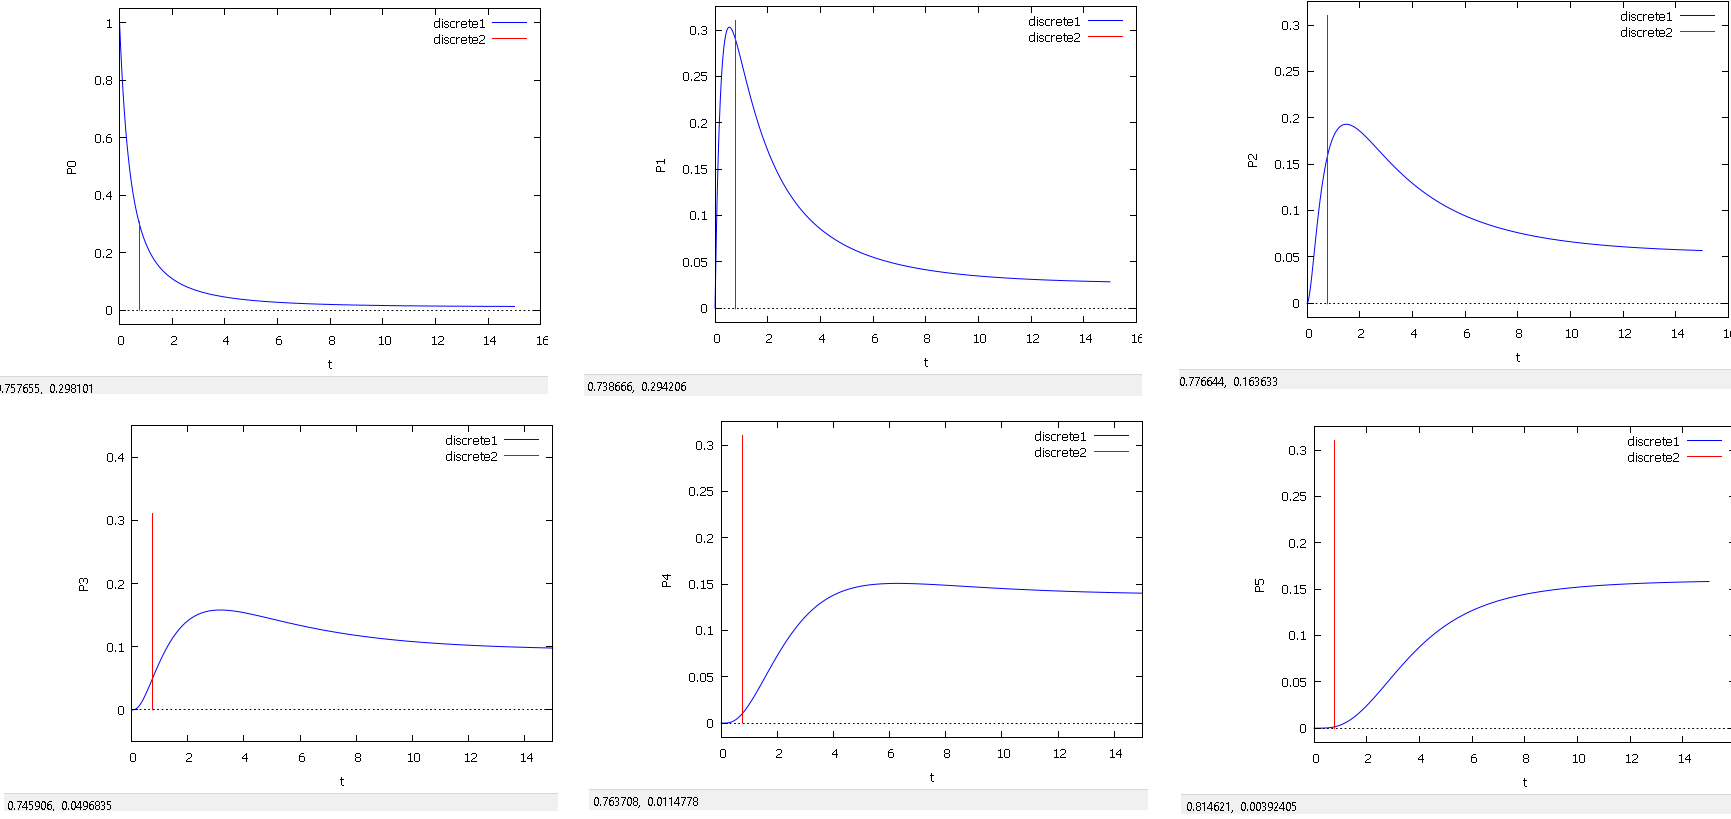

P0: 0,3, 0, 016

При этом графики вероятностей состояний S8, S9, S'8, P8(t), P9(t), P'8(t) выглядят так. Т.е.
$$
P8(t)=0,
P9(t)=0,
P'8(t)=0
$$

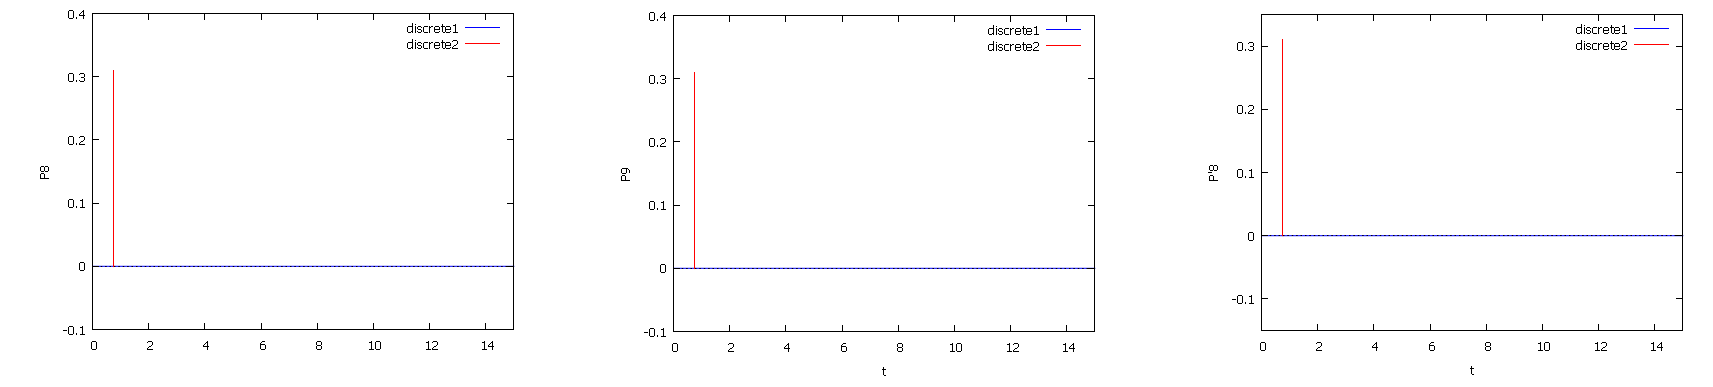


Можно найти более точно, используя точки решения. Например, с помощью метода списков maxima `last` сейчас легко извлечь "предельное" значение вероятностей, т.е. финальные значения (при $t = \infty$)

```js
/* пары точек х/y для графика P3 */
/* makelist([p[1], p[5]], p, sol); */
/* последняя такая точка при х = 15*/
   last(makelist([p[1], p[5]], p, sol));
/* коорината y такой точки при х = 15 без вывода координаты х*/
   last(makelist(p[5], p, sol));
/* вывод всех последних координат у для функций P0(t)...P'm(t)*/
 makelist(
    last(makelist(p[i], p, sol)),
    i,
    2,
    20
);
```

Вывод:
```js
[
  0.012833529560874, 0.02842939671168107, 0.05678084077592044, 0.09788421039339801,
  0.1402360857876071, 0.1582435318142673, 0.1272765463197673, 0.05628196695187609,
  0.0, 0.0,
  0.001879417979166265, 0.006087920954587321, 0.01494167816405481,
  0.03103670449247362, 0.05449914493244869, 0.07792056074670196,
  0.08331078072097839, 0.05235768369419638,
  0.0
]
```
\- это и есть финальные вероятности

Для того, чтобы найти вероятности при t, проделаю все то же самое, но в методе Рунге-Кутта выставлю пределы интегрирования от 0 до t с шагом 0.02:

```js
sol: rk([
        η*P1 - k*λ*P0 + γ*P_0 - ν*P0,
        (k)*λ*P0 + γ*P_1 + η*P2 - (η + ν + (k-1)*λ)*P1,
        (k-1)*λ*P1 + γ*P_2 + η*P3 - (η + ν + (k-2)*λ)*P2,
        (k-2)*λ*P2 + γ*P_3 + η*P4 - (η + ν + (k-3)*λ)*P3,
        (k-3)*λ*P3 + γ*P_4 + η*P5 - (η + ν + (k-4)*λ)*P4,
        (k-4)*λ*P4 + γ*P_5 + η*P6 - (η + ν + (k-5)*λ)*P5,
        (k-5)*λ*P5 + γ*P_6 + η*P7 - (η + ν + (k-6)*λ)*P6,
        (k-6)*λ*P6 + γ*P_7 + η*P8 - (η + ν + (k-7)*λ)*P7,
        /* (k-7)*λ*P7 + γ*P_8 + η*P9 - (η + ν + (k-8)*λ)*P8, */
        /* (k-8)*λ*P8 - η*P9 - ν*P9, */
        
        0,
        0,
        
        ν*P0 - γ*P_0 - k*λ*P_0,
        (k)*λ*P_0 + ν*P1 - (γ + (k-1)*λ)*P_1,
        (k-1)*λ*P_1 + ν*P2 - (γ + (k-2)*λ)*P_2,
        (k-2)*λ*P_2 + ν*P3 - (γ + (k-3)*λ)*P_3,
        (k-3)*λ*P_3 + ν*P4 - (γ + (k-4)*λ)*P_4,
        (k-4)*λ*P_4 + ν*P5 - (γ + (k-5)*λ)*P_5,
        (k-5)*λ*P_5 + ν*P6 - (γ + (k-6)*λ)*P_6,
        (k-6)*λ*P_6 + ν*P7 - (γ + (k-7)*λ)*P_7,
        /* (k-7)*λ*P_7 + ν*P8 + ν*P9, */
        
        0
    ], [
        P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,
        /* P8 , P9, */
        P_0,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8
        /* P_8 */
    ], [
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0  /* 2m + 3 = 19 штук*/
    ], [
        // заменил название перемнной на х, т.к. t уже объявлено выше, и предел интегрирования
        x, 0, t, 0.02
    ])$
```


```js
makelist(
    last(makelist(p[i], p, sol)),
    i,
    2,
    20
);
```

Вывод:

```js
[
  0.297003741872321, 0.2911974954235846, 0.1573090022128097, 0.05145831723707577, 0.01051137385121081,
  0.001316632709441987, 9.283325023345121*10^-5, 2.829245460549245*10^-6,
  0.0, 0.0,
  0.05588611148197345, 0.07264728507129967, 0.04377172959914946, 0.01515673151707628,
  0.00320479731686404, 4.10770531003821*10^-4, 2.944042818760312*10^-5, 9.082523076997561*10^-7,
  0.0
]
```
\- Это вероятности $Pi(t)$, $P'i(t)$, при $t=0.762731856433675$

Эти вероятности согласуются с теми, которые я определил визуально по графику

### Расчет характеристик

In [225]:
P <- c(
  0.012833529560874, 0.02842939671168107, 0.05678084077592044, 0.09788421039339801,
  0.1402360857876071, 0.1582435318142673, 0.1272765463197673, 0.05628196695187609,
  0.0, 0.0
)

P_ <- c(
  0.001879417979166265, 0.006087920954587321, 0.01494167816405481,
  0.03103670449247362, 0.05449914493244869, 0.07792056074670196,
  0.08331078072097839, 0.05235768369419638,
  0.0
)

P_df<-data.frame()
P_df<-rbind(P_df,P)
colnames(P_df)<- vapply(
  c(0:(m+1)),
  function(i) paste0('P', i),
  character(1)
)
rownames(P_df)<-c(rep("", times=1))
View(P_df)

P__df<-data.frame()
P__df<-rbind(P__df,P_)
colnames(P__df)<- vapply(
  c(0:m),
  function(i) paste0('P\'', i),
  character(1)
)
rownames(P__df)<-c(rep("", times=1))
View(P__df)

P0         P1        P2         P3         P4        P5        P6       
 0.01283353 0.0284294 0.05678084 0.09788421 0.1402361 0.1582435 0.1272765
 P7         P8 P9
 0.05628197 0  0

P'0         P'1         P'2        P'3       P'4        P'5        P'6       
 0.001879418 0.006087921 0.01494168 0.0310367 0.05449914 0.07792056 0.08331078
 P'7        P'8
 0.05235768 0

In [227]:
sum(P_) + sum(P) # проверка

[1] 1

In [226]:
L_queue <- sum(vapply(
    c(1:m),
    function(i) P[i+2]*i,
    double(1)
  )) + sum(vapply(
    c(1:m),
    function(i) P_[i+1]*i,
    double(1)
))

L_sist <- sum(vapply(
    c(1:(m+1)),
    function(i) P[i+1]*i,
    double(1)
  )) + sum(vapply(
    c(1:m),
    function(i) P_[i+1]*i,
    double(1)
))

L <- lambda * (1 - P[m+1 + 1] - P_[m + 1]); L

table <- data.frame(c(
  P[1],
  1 - P[1] - P[2],
  L,
  L_queue,
  L_queue / L,
  L_sist,
  L_sist / L
))

table<-cbind(table, c(
  NA,
  NA,
  NA,
  NA,
  NA,
  NA,
  NA
))
rownames(table) <- c("P_idle", "P_queue", "Λ", "L_queue", "W_queue", "Lsist", "Tsist")
colnames(table) <- c("Теория", "Эксперимент")
View(table)

[1] 0.2643521

Теория      Эксперимент
P_idle   0.01283353 NA         
P_queue  0.95873707 NA         
Λ        0.26435207 NA         
L_queue  3.88335542 NA         
W_queue 14.69008909 NA         
Lsist    4.54848800 NA         
Tsist   17.20617525 NA

## Экспериментальное решение

### Описание Алгоритма

#### каждый момент времени определяется, что раньше:
1. освободился сервер: обработалась заявка или сервер восстановился после сбоя
    > невозможно, пока сервер сломан
    
    тот разработчик, у которого обработалась приступает к написанию новой программы
    1. если очередь пустая, берется следующий на обработку
    
        shift очереди
    
        посчиталось время окончания обработки

<br />

2. пришла новая заявка
    1. если сервер работает и никого не обрабатывает, то посчиталось время окончания обработки
    2. если сервер сломан или сервер работает и обрабатывает заявку, встала в очередь
        1. если размер очереди m - получает отказ. посчиталось время написания новой программы этим разработчиком 

<br />

3. случился сбой
    > невозможно, пока сервер сломан

    посчиталось время окончания ремонта

    текущая обрабатываемая заявка помещается в начало очереди
    1. если размер очереди m - последний получает отказ. посчиталось время написания новой программы этим разработчиком 

<br />

4. сервер восстановился

    shift очереди

    посчиталось время окончания обработки


#### Статистики
1. x
    1. для извеченнного записать время + размер очереди
2. x
    1. если встал в очередь, то записать время + размер очереди
3. x
    1. для каждого добавленного в очередь записать время + размер очереди
    2. для извеченнного записать время + размер очереди
    3. $P_{отк}$ для $\Lambda$ - число отказов / число всех заявок - счетчик числа отказов
    
       отказ - это когда размер очереди равен max = m

In [228]:
shift <- function(q) {
  first <- q[1]
  for (i in 1:(length(q) - 1)) {
    q[i] <- q[i+1]
    if (q[i] == 0) {
      return(q)
    }
  }
  q[length(q)] <- 0
  return(q)
}

last <- function(q) {
  for (i in 1:length(q)) {
    if (q[i] == 0) {
      return(i-1)
    }
  }
  return(length(q))
}

# insert_to_end <- function(q, value) {
#   for (i in 1:length(q)) {
#     if (q[i] == 0) {
#       q[i] <- value
#       return(q)
#     }
#   }
#   return(q)
# }

unshift <- function(q) {
  for (i in length(q):2) {
    q[i] <- q[i-1]
  }
  q[1] = 0
  return(q)
}


# swap_fisrt_last <- function(q) {
#   tmp <- q[0]
#   q[0] <- q[length(q)]
#   q[length(q)] <- tmp
#   return(q)
# }

In [229]:
# q <- c(1:4, 0, 0, 0, 0)
# q
# q<-shift(q)
# q

# q <- c(1:8)
# q
# q<-shift(q)
# q

# q <- c(1, rep(0, times=7))
# q
# q<-shift(q)
# q

# q <- rep(0, times=8)
# q
# q<-shift(q)
# q


# q <- c(1:4, 0, 0, 0, 0)
# q
# q<-insert_to_end(q, 'fuck')
# q

# q <- c(1:8)
# q
# q<-insert_to_end(q, 'fuck')
# q

# q <- c(1, rep(0, times=7))
# q
# q<-insert_to_end(q, 'fuck')
# q

# q <- rep(0, times=8)
# q
# q<-insert_to_end(q, 'fuck')
# q


# q <- rep(0, times=8)
# q
# last(q)

# q <- c(1, rep(0, times=7))
# q
# last(q)

# q <- c(rep(1, times=8))
# q
# last(q)


# q <- rep(0, times=8)
# q
# q <- unshift(q)
# q

# q <- c(1:4, 0, 0, 0, 0)
# q
# q <- unshift(q)
# q

# q <- c(1:8)
# q
# q <- unshift(q)
# q


In [230]:
experiment <- function(lambda_local, mu_local, nu_local, gamma_local, k_local, m_local, N, DEBUG=F) {
  lambda <- lambda_local
  mu <- mu_local
  nu <- nu_local
  gamma <- gamma_local

  k <- k_local
  m <- m_local

  set.seed(Variant)


  event_timestamps <- vector(mode='double', length=N)       # вектор временных меток событий
  event_task_send <- vector(mode='logical', length=N)       # вектор поступления заявок
  event_break <- vector(mode='logical', length=N)           # вектор поломок
  event_repair <- vector(mode='logical', length=N)          # вектор починок
  event_wait_time <- vector(mode='double', length=N)        # вектор времен в системе с момента поступления до момента выхода
  event_queue_wait_time <- vector(mode='double', length=N)  # вектор времен в системе с момента поступления в очередь до момента обработки
  event_queue_size <- vector(mode='integer', length=N)
  event_exec_size <- vector(mode='integer', length=N)
  reject_cnt <- 0                    # счетчик отказов
  system_idle_time <- 0              # счетчик времени простоя
  system_idle_start_timestamp <- 0   # метка, когда начался "простой"

  time <- 0 # текущее модельное время

  break_timestamp <- 0 + rexp(1, nu)
  repair_timestamp <- Inf
  is_server_broken <- FALSE
  server_free_timestamp <- Inf
  
  # генерируем k заявок
  sends_per_programmer <- sort(rexp(k, lambda))

  queue <- vector(mode='integer', length=m) # модель очереди. см. методы для работы с очередью выше

  processing_programmer_idx <- 0

  queuing_programmer_send_timestamps <- vector(mode='double', length=k)
  queuing_programmer_queue_enter_timestamps <- vector(mode='double', length=k)
  # queuing_programmer_processing_start_timestamps <- vector(mode='double', length=k)

  for (i in 1:N) {
    # выбор потенциальной следующей заявки
    cur_programmer_idx <- which.min(sends_per_programmer)
    cur_send_timestamp <- sends_per_programmer[cur_programmer_idx]
    
    size<-last(queue)

    scenario <- which.min(c(server_free_timestamp, cur_send_timestamp, break_timestamp, repair_timestamp))
    
    if (DEBUG) {
      print(paste('шаг', i, '[ время', as.character(min(c(server_free_timestamp, cur_send_timestamp, break_timestamp, repair_timestamp))), ']'))
      print(paste(server_free_timestamp, cur_send_timestamp, break_timestamp, repair_timestamp, "=> сценарий", scenario))
      print(paste('> состояние программистов:'))
      print(sends_per_programmer)
      print(paste('> заявки на сервере:'))
      print(queuing_programmer_send_timestamps)
      print(paste('> сервер сломан?:', is_server_broken))
      print(paste('> обрабатывается заявка номер:', processing_programmer_idx))
      print(paste('> закончит обработку в:', server_free_timestamp))
      print(paste('> очередь:'))
      print(queue)
      print("")
    }

    if (scenario == 1) {
      # освободился сервер: обработалась заявка или сервер восстановился после сбоя

      time <- server_free_timestamp

      # после сбоя processing_programmer_idx == 0
      if (i == 1 || event_repair[i-1] == FALSE) {
        sends_per_programmer[processing_programmer_idx] <- server_free_timestamp + rexp(1, lambda)
        event_wait_time[i] <- time - queuing_programmer_send_timestamps[processing_programmer_idx]
        event_queue_wait_time <- time - queuing_programmer_queue_enter_timestamps[processing_programmer_idx]
        queuing_programmer_send_timestamps[processing_programmer_idx] <- 0
        queuing_programmer_queue_enter_timestamps[processing_programmer_idx] <- 0
      }
      
      processing_programmer_idx <- 0

      if (DEBUG) print("сервер освободился")
      if (size > 0) {
        processing_programmer_idx <- queue[1]
        queue <- shift(queue)
        server_free_timestamp <- server_free_timestamp + rexp(1, mu)
        if (DEBUG) print(paste("> взята заявка из очереди от программиста", processing_programmer_idx, " > закончит обрабатываться в", server_free_timestamp))
      } else {
        # очередь опустела. Будем брать след. поступившую заявку
        server_free_timestamp <- Inf # начальное значение
        system_idle_start_timestamp <- time
        if (DEBUG) print(paste("Очередь разгребли"))
      }

    } else if (scenario == 2) {
      # пришла новая заявка
      time <- cur_send_timestamp
      event_task_send[i] <- TRUE

      if (!is_server_broken && processing_programmer_idx == 0) {
        # сервер работает и никого не обрабатывает => можно забирать
        if (DEBUG) print(paste("пришла новая заявка от программиста", cur_programmer_idx, "(", cur_send_timestamp, ")", " > закончит обрабатываться в", server_free_timestamp))
        processing_programmer_idx <- cur_programmer_idx # это which.min(sends_per_programmer)
        server_free_timestamp <- cur_send_timestamp + rexp(1, mu)
        queuing_programmer_send_timestamps[processing_programmer_idx] <- cur_send_timestamp
        sends_per_programmer[processing_programmer_idx] <- Inf
        system_idle_time <- system_idle_time + time - system_idle_start_timestamp
      } else {
        # если сервер сломан или сервер работает и обрабатывает заявку, встала в очередь
        if (size == m) {
          reject_cnt <- reject_cnt + 1 # счетчик отказов
          if (DEBUG) print(paste("пришла новая заявка от программиста", cur_programmer_idx, "(", cur_send_timestamp, ")",  ' > получил отказ'))
          sends_per_programmer[cur_programmer_idx] <- cur_send_timestamp + rexp(1, lambda)
        } else {
          if (DEBUG) print(paste("пришла новая заявка от программиста", cur_programmer_idx, "(", sends_per_programmer[cur_programmer_idx], ")", ' > встал в очередь'))
          queue[size + 1] <- cur_programmer_idx
          queuing_programmer_send_timestamps[cur_programmer_idx] <- sends_per_programmer[cur_programmer_idx]
          queuing_programmer_queue_enter_timestamps[cur_programmer_idx] <- time
          sends_per_programmer[cur_programmer_idx] <- Inf
        }
      }

    } else if (scenario == 3) {
      # случился сбой | S1...Sm+1 -> S'1...S'm

      time <- break_timestamp
      event_break[i] <- TRUE
      repair_timestamp <- break_timestamp + rexp(1, gamma)

      if (DEBUG) print(paste('поломка |', 'будет восстановлен в', repair_timestamp))

      # отправляем оладушка в начало очереди
      if (size == m) {
          reject_cnt <- reject_cnt + 1 # счетчик отказов
        if (DEBUG) print(paste('разработчик', as.character(queue[size]), 'получил отказ'))
        sends_per_programmer[queue[size]] <- break_timestamp + rexp(1, lambda)
      }
      queue <- unshift(queue)
      queue[1] <- processing_programmer_idx
      
      
      processing_programmer_idx <- 0
      is_server_broken <- TRUE
      server_free_timestamp <- Inf
      break_timestamp <- Inf
    
    } else {
      # сервер восстановлен

      time <- repair_timestamp
      if (DEBUG) print(paste('починка'))
      event_repair[i] <- TRUE

      server_free_timestamp <- repair_timestamp
      break_timestamp <- repair_timestamp + rexp(1, nu)
      is_server_broken <- FALSE
      repair_timestamp <- Inf 
    }

    event_timestamps[i] <- time
    event_queue_size[i] <- last(queue)
    event_exec_size[i] <- as.integer(processing_programmer_idx != 0)

    if (DEBUG) print(paste('> лог размеров очереди:'))
    if (DEBUG) print(event_queue_size[1:i])
  
    if (DEBUG) {print("===============================================================================")}
  }



  return(list(
    event_timestamps = event_timestamps,
    event_queue_size = event_queue_size,
    event_exec_size = event_exec_size,
    
    event_task_send = event_task_send,
    event_wait_time = event_wait_time,
    event_queue_wait_time = event_queue_wait_time,
    event_break = event_break,
    event_repair = event_repair,

    reject_cnt = reject_cnt,
    system_idle_time = system_idle_time
  ))
}

In [231]:
exp_res_1 = experiment(lambda,mu,	nu,	gamma, k,	m, 5*k, DEBUG=T)

print('время событий')
print(exp_res_1$event_timestamps)
print('очередь')
print(exp_res_1$event_queue_size)

print('отправки')
print(exp_res_1$event_task_send)
print('сколько кто прождал')
print(exp_res_1$event_wait_time)
print('поломки')
print(exp_res_1$event_break)
print('починки')
print(exp_res_1$event_repair)

exp_res_1 = experiment(lambda,mu,	nu,	gamma, k,	m, 50000*k, DEBUG=F)

[1] "шаг 1 [ время 0.249705612173245 ]"
[1] "Inf 0.249705612173245 0.559168627747979 Inf => сценарий 2"
[1] "> состояние программистов:"
[1] 0.2497056 0.6931472 1.0862239 1.3363294 2.0422136 2.3263173 7.9858285
[1] "> заявки на сервере:"
[1] 0 0 0 0 0 0 0
[1] "> сервер сломан?: FALSE"
[1] "> обрабатывается заявка номер: 0"
[1] "> закончит обработку в: Inf"
[1] "> очередь:"
[1] 0 0 0 0 0 0 0 0
[1] ""
[1] "пришла новая заявка от программиста 1 ( 0.249705612173245 )  > закончит обрабатываться в Inf"
[1] "> лог размеров очереди:"
[1] 0
[1] "==============================================================================="
[1] "шаг 2 [ время 0.559168627747979 ]"
[1] "1.01409255822453 0.693147180559945 0.559168627747979 Inf => сценарий 3"
[1] "> состояние программистов:"
[1]       Inf 0.6931472 1.0862239 1.3363294 2.0422136 2.3263173 7.9858285
[1] "> заявки на сервере:"
[1] 0.2497056 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[1] "> сервер сломан?: FALSE"
[1] "> обрабатывается

In [232]:
proccessed_queries_num <- sum(exp_res_1$event_task_send)
system_work_time <- exp_res_1$event_timestamps[length(exp_res_1$event_timestamps)]
P_reject <- exp_res_1$reject_cnt / proccessed_queries_num

measures_deltas <- c(exp_res_1$event_timestamps[1] - 0, vapply(
  c(2:length(exp_res_1$event_timestamps)),
  function(i) exp_res_1$event_timestamps[i] - exp_res_1$event_timestamps[i-1],
  double(1)
))

# суммарное время поломок
out_of_service_time <- 0
for (i in 1:length(exp_res_1$event_repair)) {
  out_of_service_time <- out_of_service_time + exp_res_1$event_repair[i] - exp_res_1$event_break[i]
}



table[2] <- c(
  exp_res_1$system_idle_time / system_work_time,
  # вероятность образования очереди
  sum(measures_deltas * as.integer(exp_res_1$event_queue_size > 0)) / system_work_time,
  lambda*(1 - P_reject),
  # среднее количество программ в очереди Lоч.
  sum(measures_deltas * exp_res_1$event_queue_size) / system_work_time,
  # TODO: чтобы сходилось, W_queue надо при поломке отправлять заявку в КОНЕЦ очереди. Время обработки генерировать заного rexp(1, mu)
  sum(exp_res_1$event_queue_wait_time) / proccessed_queries_num,
  (sum(measures_deltas * exp_res_1$event_queue_size) + sum(measures_deltas * exp_res_1$event_exec_size)) / system_work_time,
  # TODO: чтобы сходилось T_sist, надо при поломке отправлять заявку в КОНЕЦ очереди. Время обработки генерировать заного rexp(1, mu)
  sum(exp_res_1$event_wait_time) / proccessed_queries_num
)

View(table)

Теория      Эксперимент 
P_idle   0.01283353 0.0094192472
P_queue  0.95873707 0.9606750027
Λ        0.26435207 0.2643520676
L_queue  3.88335542 4.0650148229
W_queue 14.69008909 0.0001575602
Lsist    4.54848800 4.6021898749
Tsist   17.20617525 7.3272008005

## Выводы

(!) Из-за того, что я вставлял вытесненную при поломке заявку в начало очереди, а не в конец, экспериментальные значения для $W_{оч}$ и $T_{сист}$ не совпадают с теоретическими.